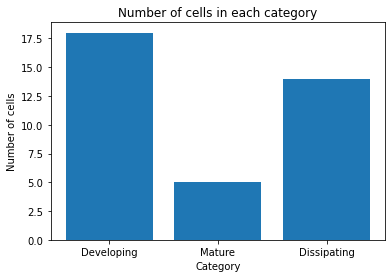

In [1]:
import matplotlib.pyplot as plt

categories = ["Developing", "Mature", "Dissipating"]
numbers = [18, 5, 14]

plt.bar(categories, numbers)
plt.xlabel("Category")
plt.ylabel("Number of cells")
plt.title("Number of cells in each category")
plt.show()


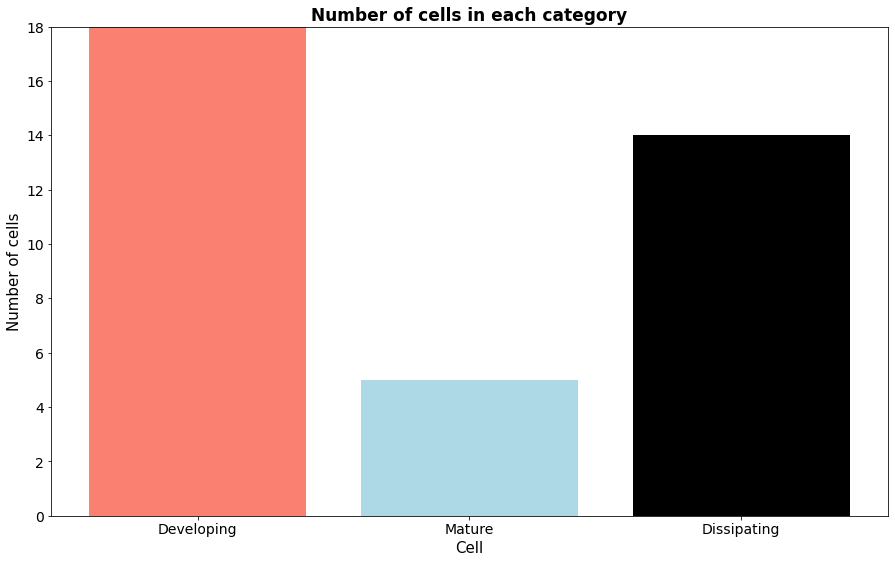

In [26]:
fig,ax = plt.subplots(figsize=(15, 9))
colors=["salmon", "lightblue", "black"]
ax.bar(categories, numbers, color=colors)
ax.set_xlabel("Cell", fontsize=15)
ax.set_ylabel("Number of cells", fontsize=15)
ax.set_title("Number of cells in each category", fontsize=17, fontweight='bold')
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x', labelsize=14)
ax.set_ylim(0, 18)
fig.savefig("cell-grouped.png", dpi=500)

In [1]:
import seaborn as sns
import xarray as xr
import matplotlib.pyplot as plt
import glob

In [2]:
# path to data
path1 = "/glade/work/noteng/masters-research/data/anx-data/otengn1/240475/"
    # kazr data
data1 = "KAZR/anxarsclkazr1kolliasM1/"


data = glob.glob(f"{path1}{data1}*.nc")
ds = xr.open_mfdataset(data)



# # start_time, end_time =  '2020-03-13 08:12:28', '2020-03-13 08:34:48'
# start_time, end_time =  '2020-03-14 03:57:16', '2020-03-14 04:18:04'

# ds = ds.sel(time=slice(start_time, end_time))

# lwp = ds['mwr_lwp']
# lwp

In [3]:
ds

<xarray.Dataset>
Dimensions:                               (time: 43200, layer: 10, height: 596,
                                           radar_mode: 4)
Coordinates:
  * time                                  (time) datetime64[ns] 2020-03-13 .....
  * layer                                 (layer) int32 0 1 2 3 4 5 6 7 8 9
  * height                                (height) float32 160.0 ... 1.801e+04
  * radar_mode                            (radar_mode) |S2 b'hi' b'md' ... b'pr'
Data variables: (12/33)
    base_time                             (time) datetime64[ns] 2020-03-13 .....
    time_offset                           (time) datetime64[ns] dask.array<chunksize=(21600,), meta=np.ndarray>
    reflectivity_best_estimate            (time, height) float32 dask.array<chunksize=(21600, 596), meta=np.ndarray>
    qc_reflectivity_best_estimate         (time, height) int32 dask.array<chunksize=(21600, 596), meta=np.ndarray>
    reflectivity                          (time, height) float32 dask.array<chunksize=(21600, 596), meta=np.ndarray>
    qc_reflectivity                       (time, height) int32 dask.array<chunksize=(21600, 596), meta=np.ndarray>
    ...                                    ...
    minimum_detectable_reflectivity_flag  (time, height) float32 dask.array<chunksize=(21600, 596), meta=np.ndarray>
    reflectivity_saturation_flag          (time, height) float32 dask.array<chunksize=(21600, 596), meta=np.ndarray>
    instrument_availability_flag          (time) int16 dask.array<chunksize=(21600,), meta=np.ndarray>
    lat                                   (time) float32 69.14 69.14 ... 69.14
    lon                                   (time) float32 15.68 15.68 ... 15.68
    alt                                   (time) float32 2.0 2.0 2.0 ... 2.0 2.0
Attributes: (12/18)
    command_line:                     idl -R -n kazrcfrarscl -n kazrcfrarsclc...
    Conventions:                      ARM-1.2
    process_version:                  vap-kazrcfrarscl-1.6-4.el7
    dod_version:                      arsclkazr1kollias-c1-4.0
    site_id:                          anx
    platform_id:                      arsclkazr1kollias
    ...                               ...
    radar_modes_in_use:               md ge
    maximum_clutter_height:           Not applicable at this site
    radar_operating_frequency_burst:      34.830 GHz
    radar_operating_frequency_chirp:      34.890 GHz
    doi:                              10.5439/1228768
    history:                          created by user malynn on machine node1...

In [4]:
# Decaying cells for reflectivity
ref_time_ranges_decay = [
    ('2020-03-13 10:00:12', '2020-03-13 10:11:56'), #3
    ('2020-03-13 16:29:40', '2020-03-13 16:38:20'), #17
    ('2020-03-13 23:38:56', '2020-03-14 00:16:28'), #29
    ('2020-03-14 00:13:24', '2020-03-14 00:30:44'), #30
    ('2020-03-14 03:17:16', '2020-03-14 03:41:20'), # 34
]

# Mature cells for reflectivity
ref_time_ranges_matured = [
    ('2020-03-13 08:12:28', '2020-03-13 09:06:36'), #1
    ('2020-03-13 11:00:32', '2020-03-13 11:32:28'), #7
    ('2020-03-13 11:48:08', '2020-03-13 12:09:04'), #9
    ('2020-03-13 12:03:08', '2020-03-13 12:38:04'), #10
    ('2020-03-13 12:32:48', '2020-03-13 13:14:32'), #11
    ('2020-03-13 15:09:36', '2020-03-13 15:45:20'), #14
    ('2020-03-13 21:48:20', '2020-03-13 22:13:00'), #27
    ('2020-03-13 22:28:24', '2020-03-13 23:00:00'), #28
    ('2020-03-14 01:06:40', '2020-03-14 01:24:08'), #31
    ('2020-03-14 03:57:16', '2020-03-14 04:31:56'), #35
    ('2020-03-14 04:27:40', '2020-03-14 04:50:20'), #36
]

# Developing for reflectivity
ref_time_ranges_developing = [
    ('2020-03-13 09:12:48', '2020-03-13 09:58:16'), #2
    ('2020-03-13 10:14:32', '2020-03-13 10:29:00'), #4
    ('2020-03-13 10:22:40', '2020-03-13 10:46:56'), #5
    ('2020-03-13 10:42:32', '2020-03-13 10:59:04'), #6
    ('2020-03-13 11:30:44', '2020-03-13 11:51:52'), #8
    ('2020-03-13 13:53:00', '2020-03-13 14:05:16'), #12
    ('2020-03-13 14:03:28', '2020-03-13 14:31:20'), #13
    ('2020-03-13 15:48:00', '2020-03-13 16:12:44'), #15
    ('2020-03-13 16:12:00', '2020-03-13 16:33:44'), #16
    ('2020-03-13 16:44:24', '2020-03-13 17:13:32'), #18
    ('2020-03-13 17:12:56', '2020-03-13 17:45:48'), #19
    ('2020-03-13 18:10:04', '2020-03-13 18:28:04'), #20
    ('2020-03-13 18:27:28', '2020-03-13 18:50:04'), #21
    ('2020-03-13 19:15:32', '2020-03-13 19:54:00'), #22
    ('2020-03-13 19:47:12', '2020-03-13 20:15:52'), #23
    ('2020-03-13 20:14:12', '2020-03-13 20:48:12'), #24
    ('2020-03-13 20:48:36', '2020-03-13 21:21:40'), #25
    ('2020-03-13 21:27:40', '2020-03-13 21:50:48'), #26
    ('2020-03-14 02:19:20', '2020-03-14 02:34:36'), #32
    ('2020-03-14 02:43:24', '2020-03-14 03:12:44'), #33
    ('2020-03-14 04:49:56', '2020-03-14 05:19:48') #37
    
]

In [5]:
for index, [start_time, end_time] in enumerate(ref_time_ranges_matured):
    ds1 = ds.sel(time=slice(start_time, end_time))
    lwp_ds = ds1['mwr_lwp']
   
    dataset = xr.concat(lwp_ds, dim='time')
    print(dataset)
    # dataset.to_netcdf('m-lwp.nc')
    
# for index, [start_time, end_time] in enumerate(ref_time_ranges_decay):
#     ds1 = ds.sel(time=slice(start_time, end_time))
#     lwp_ds = ds1['mwr_lwp']
   
#     dataset = xr.concat(lwp_ds, dim='time')
#     dataset.to_netcdf('dec-lwp.nc')
    
    
# for index, [start_time, end_time] in enumerate(ref_time_ranges_developing):
#     ds1 = ds.sel(time=slice(start_time, end_time))
#     lwp_ds = ds1['mwr_lwp']
   
#     dataset = xr.concat(lwp_ds, dim='time')
#     dataset.to_netcdf('dev-lwp.nc')

<xarray.DataArray 'mwr_lwp' (time: 813)>
dask.array<concatenate, shape=(813,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2020-03-13T08:12:28 ... 2020-03-13T09:06:36
Attributes:
    long_name:            Liquid water path best-estimate from microwave radi...
    units:                g/m^2
    ancillary_variables:  qc_mwr_lwp
<xarray.DataArray 'mwr_lwp' (time: 480)>
dask.array<concatenate, shape=(480,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2020-03-13T11:00:32 ... 2020-03-13T11:32:28
Attributes:
    long_name:            Liquid water path best-estimate from microwave radi...
    units:                g/m^2
    ancillary_variables:  qc_mwr_lwp
<xarray.DataArray 'mwr_lwp' (time: 315)>
dask.array<concatenate, shape=(315,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2020-03-13T11:48:08 ... 2020-03-13T12:0

In [6]:
xr.open_dataset("m-lwp.nc")['mwr_lwp']

<xarray.DataArray 'mwr_lwp' (time: 341)>
array([ 15.805604,  15.805604,  15.805604, ..., 359.6911  , 359.6911  ,
       359.6911  ], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2020-03-14T04:27:40 ... 2020-03-14T04:50:20
Attributes:
    long_name:            Liquid water path best-estimate from microwave radi...
    units:                g/m^2
    ancillary_variables:  qc_mwr_lwp

In [5]:
mat = xr.open_dataset("m-lwp.nc")['mwr_lwp'].data / 1000
dec = xr.open_dataset("dec-lwp.nc")['mwr_lwp'].data / 1000
dev = xr.open_dataset("dev-lwp.nc")['mwr_lwp'].data / 1000

In [6]:
import numpy as np

In [7]:
np.nanmin(mat), np.nanmin(dec), np.nanmean(dev)

(0.013720432, -0.0042277, 0.15506628)

In [8]:
np.nanmax(mat), np.nanmax(dec), np.nanmax(dev)

(0.9151607, 0.060060665, 0.55647016)

In [9]:
import seaborn as sns
sns.set_theme(style="whitegrid")

NameError: name 'dev' is not defined

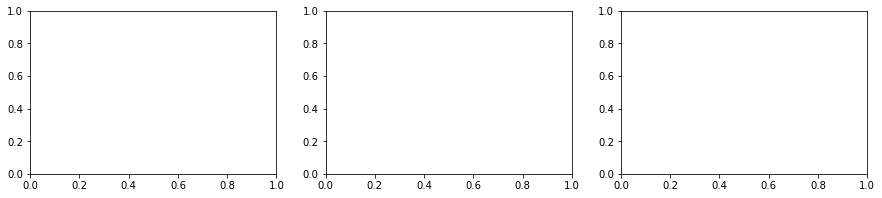

In [6]:
fig, ax = plt.subplots(1, 3, figsize=(15, 3))
ax = ax.flatten()

# Customize the color of quartiles (median and IQR)
boxprops = {'edgecolor': 'red', 'facecolor': 'green'}
sns.violinplot(x=dev, ax=ax[0], color='brown', linewidth=3, showmedians=True)
sns.violinplot(x=mat, ax=ax[1], color='royalblue', linewidth=3)
sns.violinplot(x=dec, ax=ax[2], color='blue', linewidth=3,)
ax[0].set_xlim(0,1)
ax[1].set_xlim(0,1.1)
ax[2].set_xlim(0,0.1)

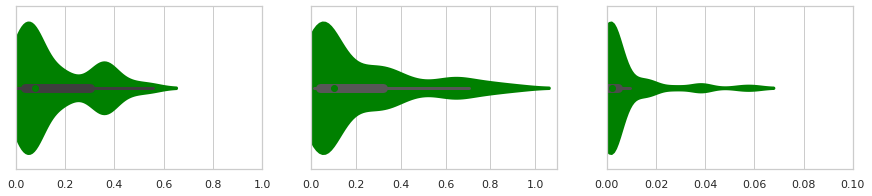

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt


fig, ax = plt.subplots(1, 3, figsize=(15, 3))
ax = ax.flatten()

# Create violin plots
sns.violinplot(x=dev, ax=ax[0], color='brown', linewidth=3)
sns.violinplot(x=mat, ax=ax[1], color='royalblue', linewidth=3)
sns.violinplot(x=dec, ax=ax[2], color='blue', linewidth=3)

# Modify quartile and median line colors
quartile_color = 'green'  # Change this to the desired color for quartiles
median_color = 'yellow'  # Change this to the desired color for the median line

for a in ax:
    for pc in a.collections:
        pc.set_facecolor(quartile_color)
        pc.set_edgecolor(quartile_color)

    for line in a.lines:
        if 'whisker' in line.get_label():
            line.set_color(quartile_color)
        elif 'median' in line.get_label():
            line.set_color(median_color)

# Set x-axis limits
ax[0].set_xlim(0, 1)
ax[1].set_xlim(0, 1.1)
ax[2].set_xlim(0, 0.1)

plt.show()


In [13]:
new_ds = xr.open_dataset("try-lwp.nc")
lwp_mature = new_ds['mwr_lwp'].data / 1000
# lwp_mature

<AxesSubplot:>

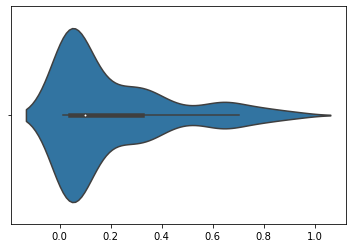

In [14]:
sns.violinplot(x=lwp_mature, )

<AxesSubplot:>

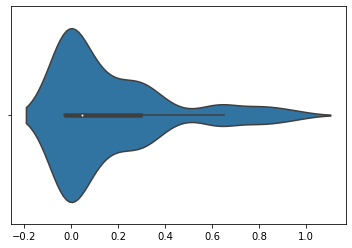

In [17]:

sns.violinplot(x=lwp.values/1000)

<AxesSubplot:>

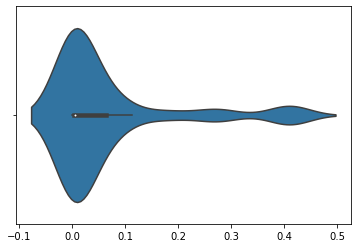

In [19]:
sns.violinplot(x=lwp.values/1000)